In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# SEABORN

It is a statistical plotting library.

It is designed to work well with Pandas DataFrame

**To load the dataset to a seaborn sns object we use sns.load_dataset()**

Seaborn actually provides a lot of default datasets built into it, and one of them is the 'tips' dataset

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
df= sns.load_dataset('tips')
df.rename(columns= {'sex':'gender'}, inplace= True)
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# DISTRIBUTION PLOTS

1. distplot

2. jointplot

3. pairplot

4. rugplot

5. kdeplot

6. scatterplot

*1. displot() or Histogram*

This plot shows the distribution of a univariate set of observations

This gives a histogram and a Kernel Density Plot(kde) plot 

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

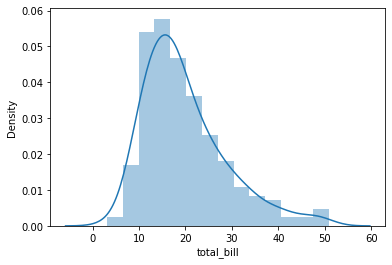

In [4]:
sns.distplot(df['total_bill'])  # the line in this histogram is the kde plot

# Here the plot is mainly only of one varibale total_bill, so total_bill values are binned in x axis and the the density of total_bill is plotted in y axis

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

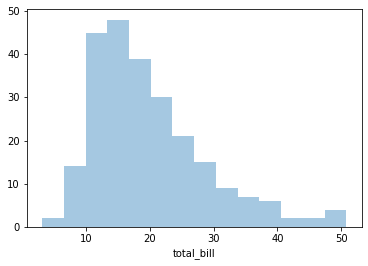

In [5]:
# To remove the kde plot, we can use kde= False as an argument
sns.distplot(df['total_bill'], kde= False)
# In this plot since kde is removed the y axis is having count instead of density as in the previous plot

<AxesSubplot:xlabel='total_bill'>

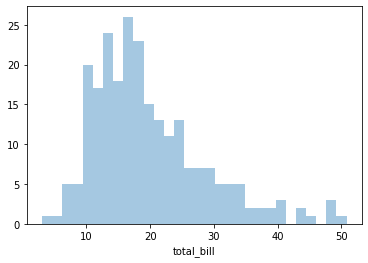

In [6]:
# TO change the number of bins, we have bins argumnet
sns.distplot(df['total_bill'], kde= False, bins=30)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

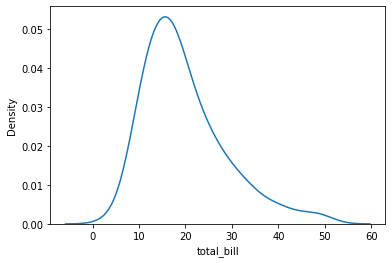

In [7]:
# If we want only KDE and not histogram, we have kdepolt()
sns.kdeplot(df['total_bill'])

*2. jointplot*

This plot shows the distribution of bi-variate data of the datset

In simple, it combines 2 different distplots

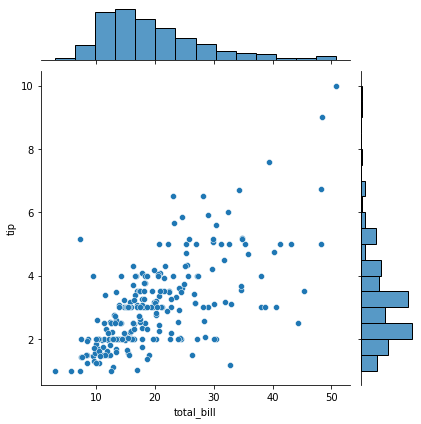

In [8]:
sns.jointplot(x='total_bill',y='tip',data=df)
# from the plot we can see that the jointplot gives u the relationship between the 2 variables, by default kind= scatter
# from this plot we can assume that total_bill is proportional to tip amount, higher the total_bill higher is the tip received

In [9]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


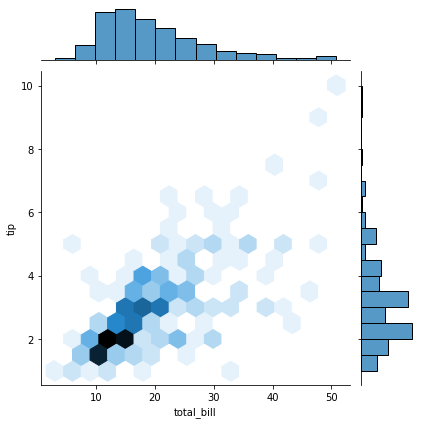

In [10]:
# we can change the kind argument as scatter, hex, reg, kde
sns.jointplot(x='total_bill',y='tip',data=df, kind='hex')

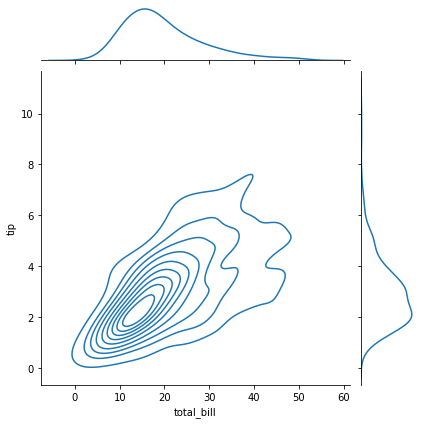

In [11]:
sns.jointplot(x='total_bill',y='tip',data=df, kind='kde')

*3. pairplot*

It plots pairwise relationships across an entire dataframe atleast for numerical columns

It also supports for color hue parameter for categorical columns

In simple, it does jointplot() for every single columns of a dataframe

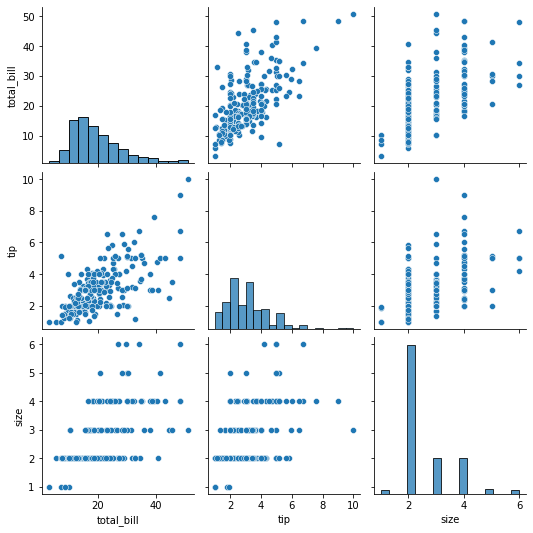

In [12]:
sns.pairplot(data=df)

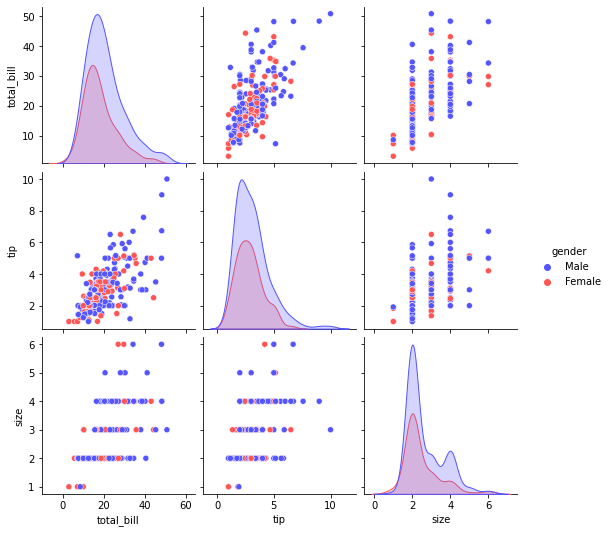

In [13]:
# hue argument is used for categorical columns
sns.pairplot(df, hue='gender', kind='scatter', palette='seismic')

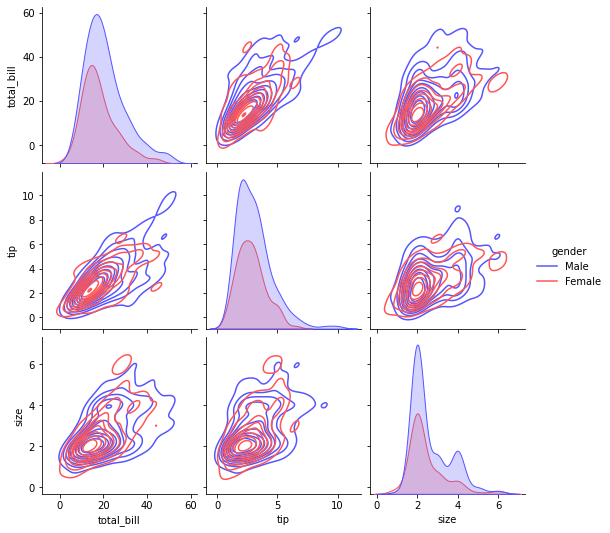

In [14]:
sns.pairplot(df, hue='gender', kind='kde', palette='seismic')

*4. rugplot*

It just draws a dash mark for every points on this unique variant distribution for one single variable

<AxesSubplot:xlabel='total_bill'>

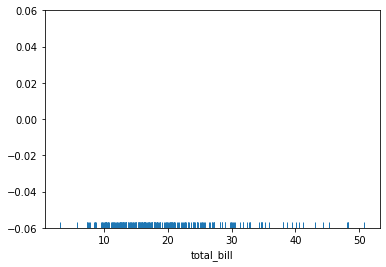

In [15]:
sns.rugplot(df['total_bill'])
# KDE = Normal distrbution + rugplot
# To get KDE plot we use rugplot

# CATEGORICAL PLOTS

1. barplot

2. countplot

3. boxplot/ whiskerplot

4. violinplot

5. strippplot

6. swarmplot

7. factorplot

In categorical plots, we will see the distributions of the categorical columns

*1. barplot*

It is the general plot which is used to aggregate the categorical data based off of some functions and by default that's the mean.

We can consider this as a visualization of a groupby() method.

In [15]:
df.query('gender == "Male"').mean(numeric_only=True)[0]

20.744076433121016

<AxesSubplot:xlabel='gender', ylabel='total_bill'>

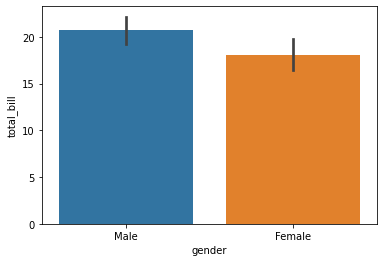

In [16]:
# Here we will plot for the categorical column gender and another numerical column total_bill
sns.barplot(x='gender',y='total_bill',data=df)  # Here by default the aggregate function is mean
# From this plot we can infer that the mean of total_bill for the males is higher than that of females. 

Estimator:- Statistical function to estimate within each categorical bin

Like mean, std, median .....

<AxesSubplot:xlabel='gender', ylabel='total_bill'>

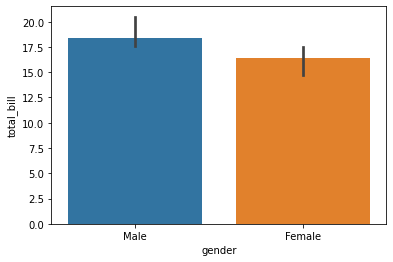

In [17]:
# we can aggregate the barplot based on other estimators like mean, median, std and so on
sns.barplot(x='gender', y='total_bill', data=df, estimator= np.median)

*2. countplot*

It is similar to bar plot except that the estimator is explicitly counting the number of occurences

Since the y axis is fixed with number of occurences we only set the x axis values

In [18]:
print(df.query('gender == "Male"').count()[0])
df.query('gender == "Female"').count()[0]

157


87

<AxesSubplot:xlabel='gender', ylabel='count'>

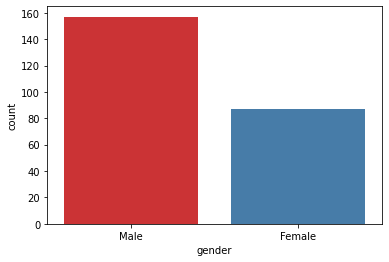

In [19]:
sns.countplot(x='gender', data=df, palette= 'Set1')
# from this plot we can see that we can see that the y axis is having the count values and x axis a categorical column
# This is also a visualisation of df['gender'].count()

*3. boxplot / whiskerplot*

This is used to show the distribution of categorical data 

boxplot gives idea about how tightly your data is grouped, how your data is skewed and much more 

Boxplot manily has 5 parts: Minimum value, 1st quartile, 2nd quartile/median, 3rd quartile, maximum value 

<img src="https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png">

,total_bill,tip,size
count,19.000000,19.000000,19.000000
mean,17.151579,2.734737,2.105263
std,8.302660,1.019577,0.567131
min,5.750000,1.000000,1.000000
25%,12.095000,1.960000,2.000000
50%,15.380000,3.000000,2.000000
75%,21.750000,3.365000,2.000000
max,40.170000,4.730000,4.000000


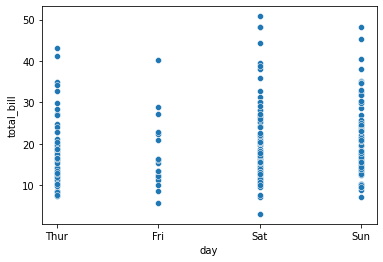

In [20]:
maxi= df.query('day == "Fri"')
sns.scatterplot(x='day',y='total_bill', data= df, palette= 'seismic')

maxi.describe()

<AxesSubplot:xlabel='day', ylabel='total_bill'>

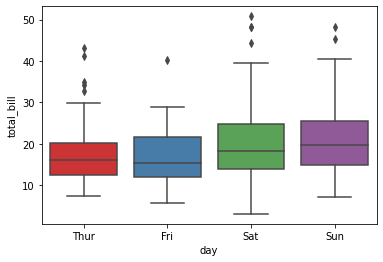

In [21]:
sns.boxplot(x='day',y='total_bill',data=df, palette='Set1') 
# Here 'day' being the categorical column and the 'total_bill' being the numerical column.
# Those diamond symbol plots are called as the outliers- which are very distant from the rest of the data. 

In [22]:
df.query('smoker == "Yes" & day == "Fri"').median(numeric_only=True)

total_bill    13.42
tip            2.50
size           2.00
dtype: float64

<AxesSubplot:xlabel='day', ylabel='total_bill'>

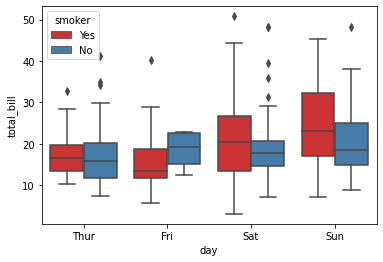

In [23]:
# hue paramter can be used in boxplot to check the categorical value of that column
sns.boxplot(x='day',y='total_bill',data=df, hue= 'smoker', palette= 'Set1') 

# From this plot we can see that on Friday the median value is pretty low for smoker as compared to other days
# WE can also see how the maximum value of boxplot is higher on weekends as compared to weekdays

*4. violinplot*

This is almost similar to boxplot which is used to show the distributions of categorical data 

Here it will show the KDE of the underlying distribution

<AxesSubplot:xlabel='day', ylabel='total_bill'>

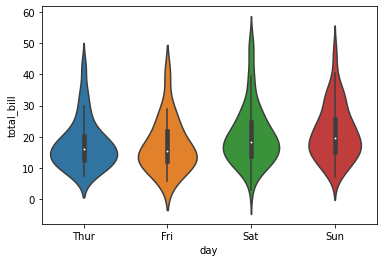

In [24]:
sns.violinplot(x='day',y='total_bill',data= df)
# from this plot we can see that it is very similar to boxplot but the sole difference being the kde in violin plot
# violinplot has more information covered than boxplot
# but violinplot cannot be used to display to the clients or the users, only data scientists or statisticians can understand it

<AxesSubplot:xlabel='day', ylabel='total_bill'>

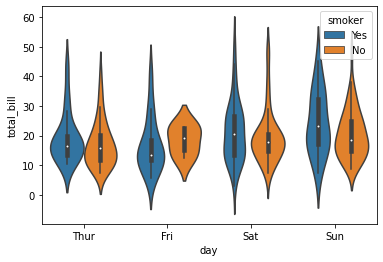

In [25]:
# hue parameter is also available in violinplot
sns.violinplot(x='day',y='total_bill',data= df, hue= 'smoker')
# here we can see that it plots for categorical column separately under same bin

In [26]:
print(df.query('day == "Thur"').min())
print()
print(df.query('day == "Fri" & smoker== "No"').median(numeric_only=True))
arr = np.array([13.42,19.235])
print()
print(np.mean(arr))

total_bill    7.51
tip           1.25
size          1.00
dtype: float64

total_bill    19.235
tip            3.125
size           2.000
dtype: float64

16.3275


C:\Users\mithun\AppData\Local\Temp/ipykernel_18388/130422375.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.query('day == "Thur"').min())


<AxesSubplot:xlabel='day', ylabel='total_bill'>

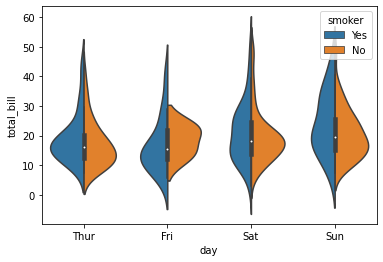

In [27]:
# but that can be made look much better using split attribute
sns.violinplot(x='day',y='total_bill',data= df, hue= 'smoker', split= True)
# we can see that instead of plotting two different categorical values, when split= True it plots into same bin
# This is also very efficient way of making use of hue parameter

*5. stripplot*

It's going to plot a scatterplot where one of the axis is containing categorical column

<AxesSubplot:xlabel='day', ylabel='total_bill'>

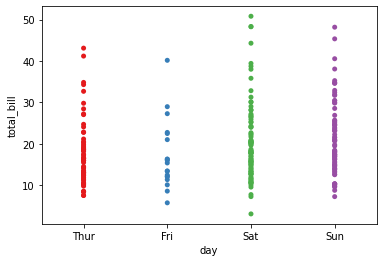

In [28]:
sns.stripplot(x='day',y='total_bill',data= df, jitter= False, palette= 'Set1')
# It justs plots all the data points in that particular categorical column

<AxesSubplot:xlabel='day', ylabel='total_bill'>

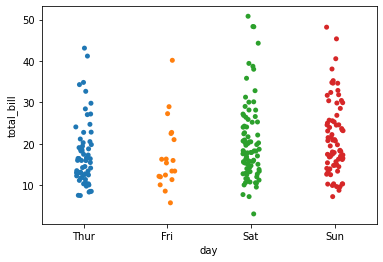

In [29]:
# WE can see that it's very difficult to see the plots as all are stacked upon each other, so we can use jitter attribute
sns.stripplot(x='day',y='total_bill',data= df, jitter= True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

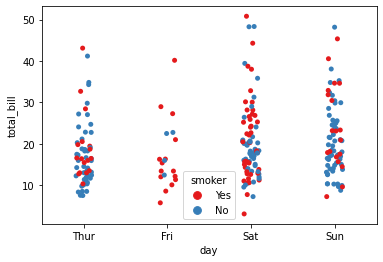

In [30]:
# hue paramter can be used here as well
sns.stripplot(x='day',y='total_bill',data= df, jitter= True, hue='smoker',palette= 'Set1')

*6. swarmplot*

The basic idea here is to combine stripplot and violinplot

The difference between striplot here is that the values don't overlap each other. hence giving better representation

<AxesSubplot:xlabel='day', ylabel='total_bill'>

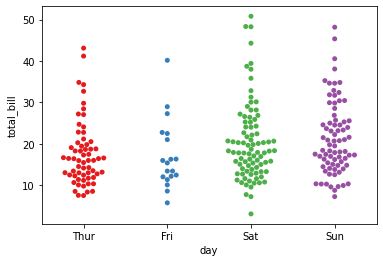

In [31]:
sns.swarmplot(x='day',y='total_bill',data= df, palette= 'Set1')
# We can see the disadvantage is that it can't be used when large number of values are present in the dataset

<AxesSubplot:xlabel='day', ylabel='total_bill'>

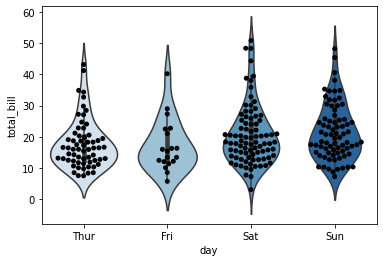

In [32]:
# If we want to see the overlap of violinplot and swamrplot
sns.violinplot(x='day',y='total_bill',data= df, palette= 'Blues')
sns.swarmplot(x='day',y='total_bill',data= df, color='black')
# from this we can also make out that number of obsesrvations of Friday is less as comapred to other days

*7. factorplot*

It's very basic plot for drawing all these plots

we can plot any  of these plots using kind attribute

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


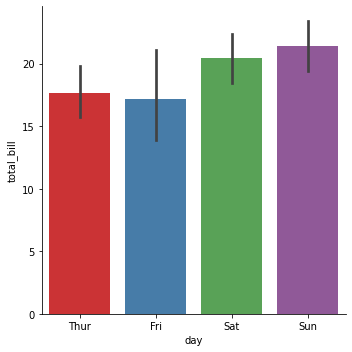

In [33]:
# To draw a bar plot use kind= 'bar'
sns.factorplot(x='day',y='total_bill',data= df, kind= 'bar',palette= 'Set1')

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


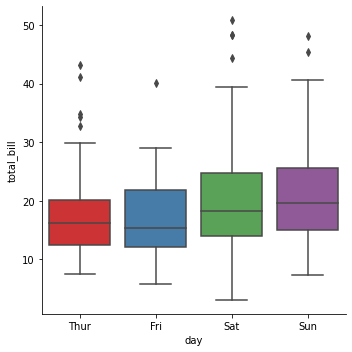

In [34]:
# To draw a box plot use kind= 'box'
sns.factorplot(x='day',y='total_bill',data= df, kind= 'box',palette= 'Set1')

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


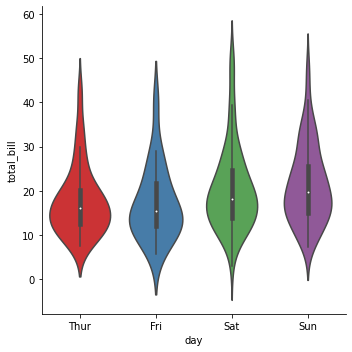

In [35]:
# To draw a violin plot use kind= 'violin'
sns.factorplot(x='day',y='total_bill',data= df, kind= 'violin',palette= 'Set1')

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


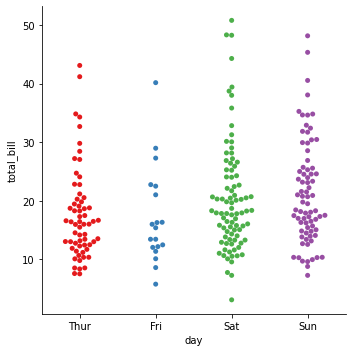

In [36]:
# To draw a swarm plot use kind= 'swarm'
sns.factorplot(x='day',y='total_bill',data= df, kind= 'swarm',palette= 'Set1')

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


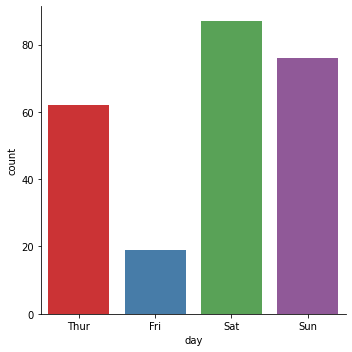

In [37]:
# To draw a strip plot use kind= 'strip'
sns.factorplot(x='day',data= df, kind= 'count',palette= 'Set1')

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


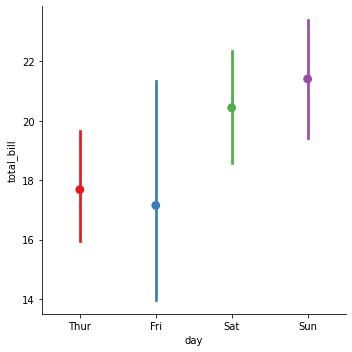

In [38]:
sns.factorplot(x='day',y='total_bill',data= df,palette= 'Set1')

# MATRIX PLOT

1. heatmap

2. clustermap

Loading the datasets

In [39]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
flights= sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


*1. heatmap*

In order do to the things in heatmap, our data should be in matrix form 

It means all the variables should be present in both rows and columns

Generally, rows have index values, so it must be replaced with variables(column_names) with actual values

In [41]:
tc= df.corr()
tc
# This is how the matrix form should look like

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

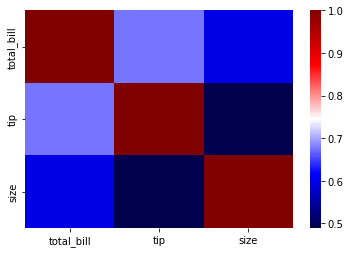

In [42]:
# Since now the data is in the form of matrices we can plot a heatmap
sns.heatmap(tc, cmap= 'seismic')
# Heatmap just creates a gradient scale and plots on the matrix based on the gradient scale values

<AxesSubplot:>

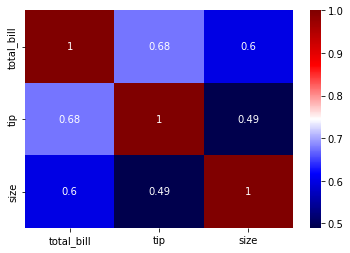

In [43]:
# annot attribute will annotate the values on heatmap
# cmap attribute will set the color tone of the heatmap
sns.heatmap(tc, annot= True, cmap= 'seismic')  # other values present for cmap are coolwarm, magma, plasma, seismic and a lot more
# from this plot we can make out that the gradient scale is bluer for lower values and red for higher values
# We can infer that:
# total_bill vs size correlation is very less
# tip vs size is least
# tip vs total_bill correaltion is more among others

In [44]:
# Now let's see for flights dataframe, but it's not in matrix form
fp= flights.pivot_table(index= 'month', columns= 'year', values= 'passengers')
fp.head()   # this looks like a matrix form, so we can now plot a heatmap

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<AxesSubplot:xlabel='year', ylabel='month'>

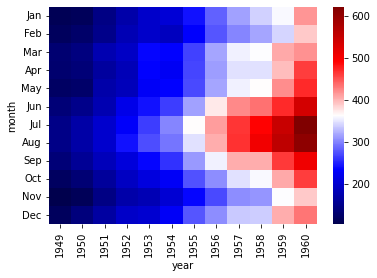

In [45]:
sns.heatmap(fp, cmap= 'seismic')

<AxesSubplot:xlabel='year', ylabel='month'>

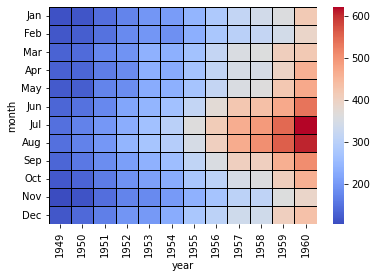

In [46]:
# If we want to separate the lines/ borders among each matrix we can use linewidths
sns.heatmap(fp, cmap= 'coolwarm', linecolor= 'black', linewidths=1) # by default it has white linecolor
# from this plot we can infer that:
# There are more number of passengers increasing as the timeline of years passes
# There are more number of passengers during the period of June, July, Aug, Sep as compared to other months, this is because it's considered as summer in USA and the number of passengers decreases during winter period

*2. clustermap*

Cluster map is actually going to use hierarchial clustering to produce a clustered version of heatmap

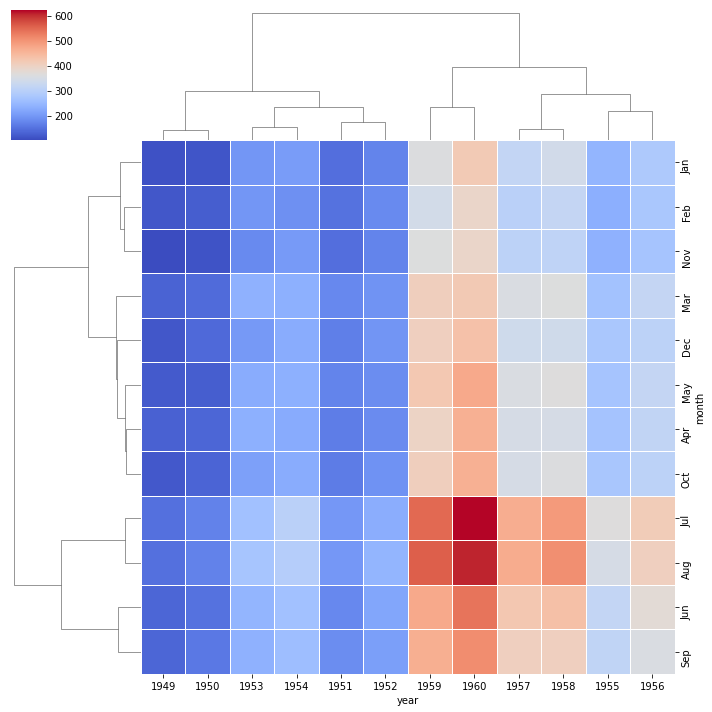

In [47]:
sns.clustermap(fp, cmap= 'coolwarm', linewidths= 1)

* From this plot we can clearly see that our heatmap has been ordered hierarchially

* This basically clusters the information to try to show columns and rows that are similar to each other. 

* From our past inferences we made that the number of passengers is high during Jul, Aug has been made into one group in this plot.

* We can also see that the years from 1949-50, 1951-52,1953-54, 1959-60 are all grouped into their respective groups

* We can also infer from this graph that durint the reign of 1959-1960 there have been many passengers who boarded flights as compared to other years.

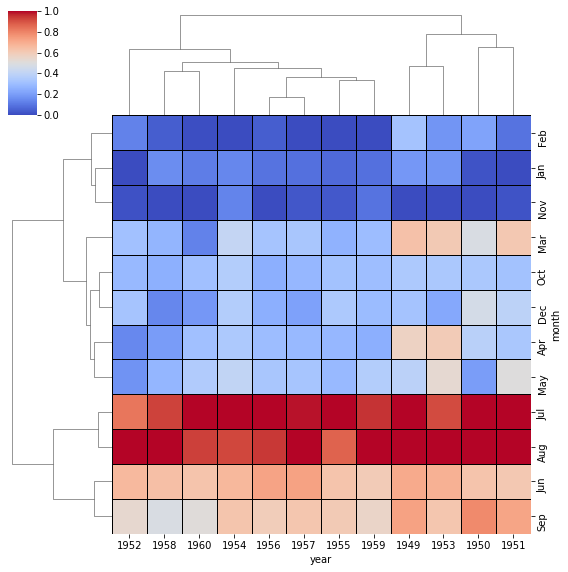

In [48]:
# We can also change the scale to understand it in a more better way
fig= sns.clustermap(fp, cmap= 'coolwarm', linecolor='black',linewidths= 1, standard_scale=1, figsize=(8,8))

In [49]:
fig.savefig('heatmap.pdf')

*We would learn a lot of clustermap in ML clustering algorithms*

# GRIDS

Here we will be using grids ability to automate subplots

In [50]:
iris= sns.load_dataset('iris')
iris.head() # here we have four numerical columns and one cateogorical column species

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
iris['species'].unique()    # we only 3 different unique values present in the species column

array(['setosa', 'versicolor', 'virginica'], dtype=object)

*1. PairGrid*

pairplot is actually based on PairGrid, pairplot does everything automatically but PairGrid can you better a better control over it

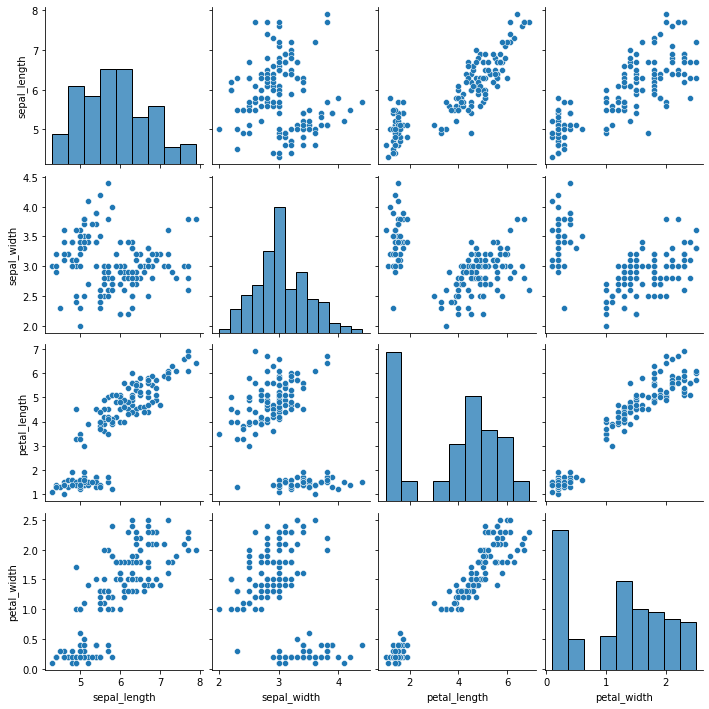

In [52]:
sns.pairplot(iris)

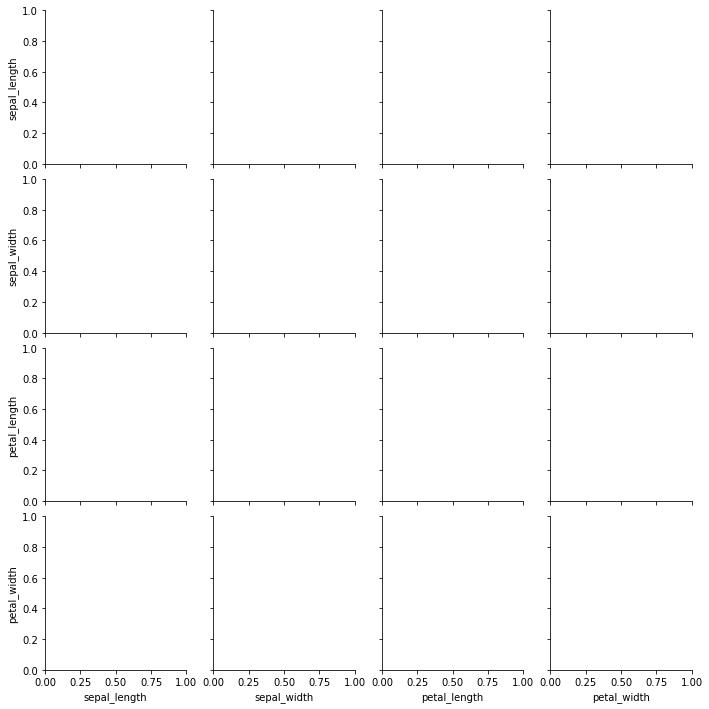

In [53]:
# FOr the same we will do with PairGrid
g = sns.PairGrid(iris)  
    # This just creates a empty subplots, we manually need to map the kind of plots needed in this subplots

In [54]:
# to plot the values on this subplots we use map()
g.map(sns.scatterplot)  # (or) g.map(plt.scatter)
# this will plot scatterplots on every subplots which were created before

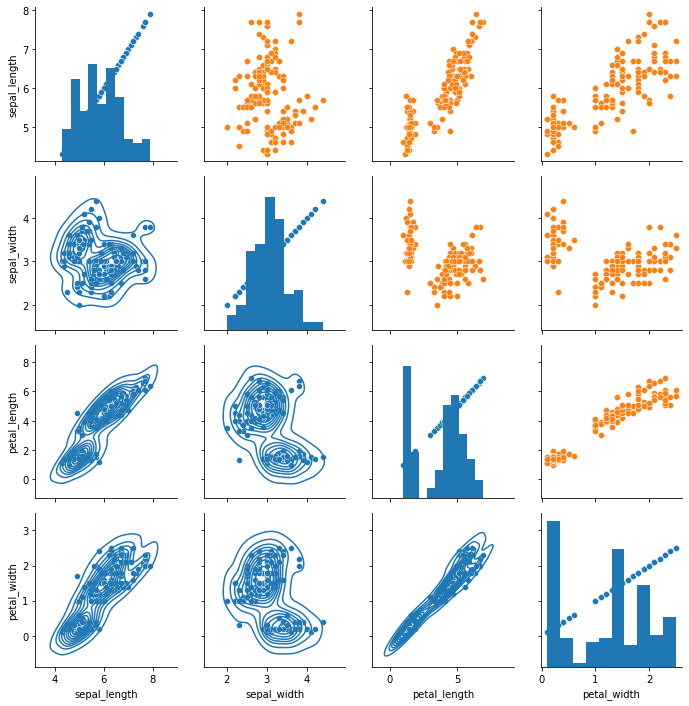

In [55]:
# If we want to specify a certain kind of plots for diagonal subplots like in pairplot
g.map_diag(plt.hist)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
# here we can see that we have created a manual pairplot using PairGrid

*2. FacetGrid*

In [56]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


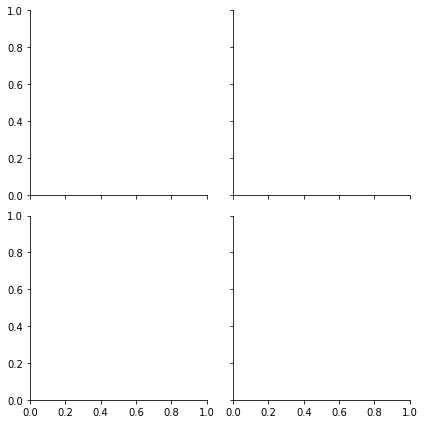

In [57]:
fg = sns.FacetGrid(row='time', col='smoker', data= df)   # this would just create a blank subplot, we need to manually map the plots we needed

In [58]:
fg.map(sns.histplot, 'total_bill')
# here total_bill is going to be x-axis
# Since this is distplot density will be at y-axis
# here we have mainly 4 unique values:-
# Smoker: Yes / No
# time: Lunch / Dinner
# It draws a distplot for all possible combination  of values for smoker and time(which is passed as row and col in the parameters)

In [59]:
# If I want a scatterplot to be plotted
fg.map(sns.scatterplot,'total_bill','tip')
fg.map(sns.kdeplot,'total_bill','tip')
# here in this plot we can see that total_bill is on x-axis and tip is on y-axis
# it plots separately for all possible combinations of smoker and time values passed in the rows and cols in the parameters

In [60]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


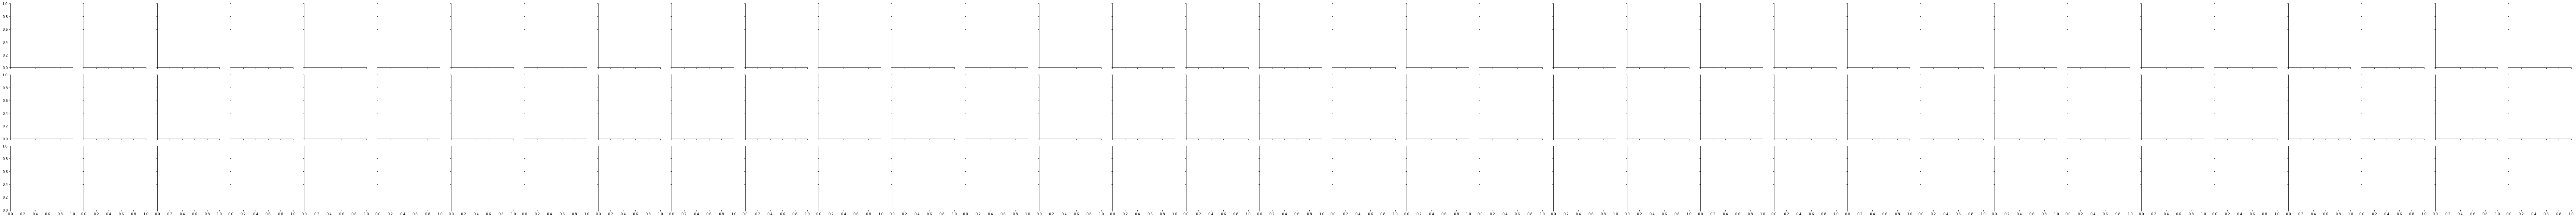

In [61]:
new= sns.FacetGrid(row='species',col='sepal_length',data=iris)

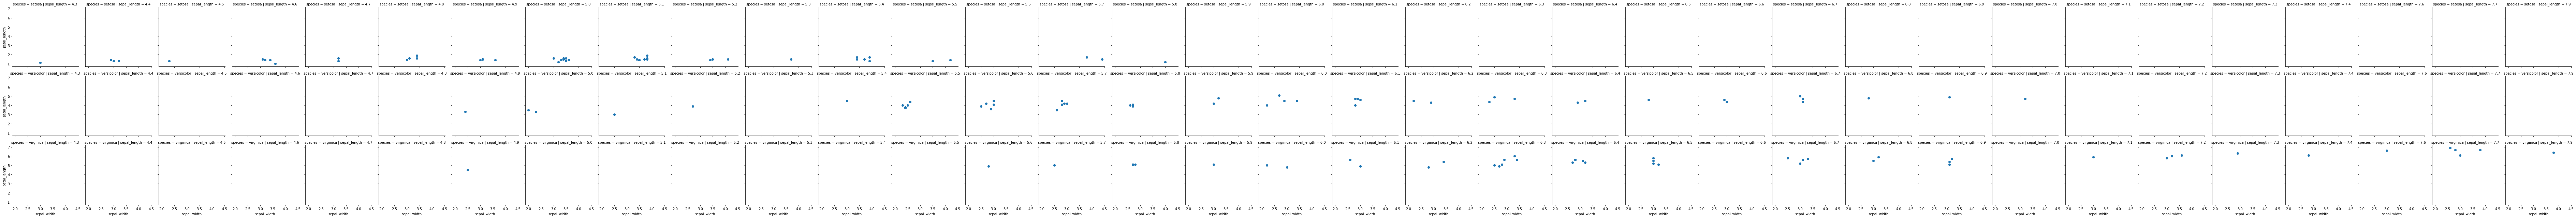

In [62]:
new.map(plt.scatter, 'sepal_width', 'petal_length')

# REGRESSOIN PLOTS

Regression plots are genrally used in Machine learning algorithm called linear regression

In this we can see that the seaborn library actually calling the matplotlib under the hood

*1. lmplot*

It allows us to display linear models with seaborn

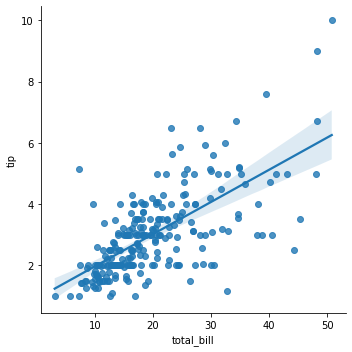

In [63]:
sns.lmplot(x='total_bill',y='tip',data=df)  # this plots a regression plot which we have seen earlier in the jointplot kind='reg' parameter

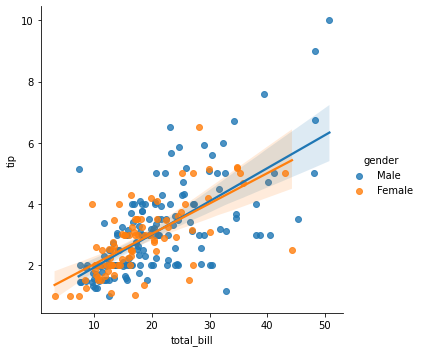

In [64]:
# hue parameter is supported in this lmplot
sns.lmplot(x='total_bill',y='tip',data=df, hue='gender') 
# So this creates a hue of male and female whcih are separated by different colors
# from this plot we can see that the linear model line/ regression line is almost same between male and female
# this tells us that the total_bill vs tips linear model is almost same for both

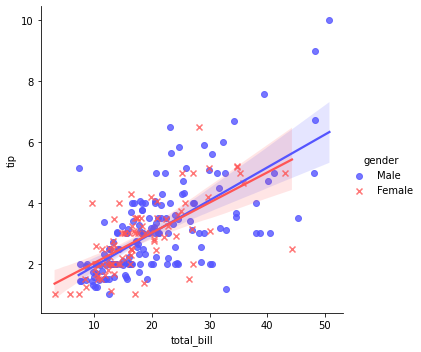

In [65]:
# we can also add our own markers and markersize in the plots
sns.lmplot(x='total_bill',y='tip',data=df, hue='gender', markers=['o','x'], palette='seismic') 
# here we see that male is marked as 'o' and female as 'x' in orange
# scatter_kws={'s':27} means the size of the markers set, 's' stands for the scatters

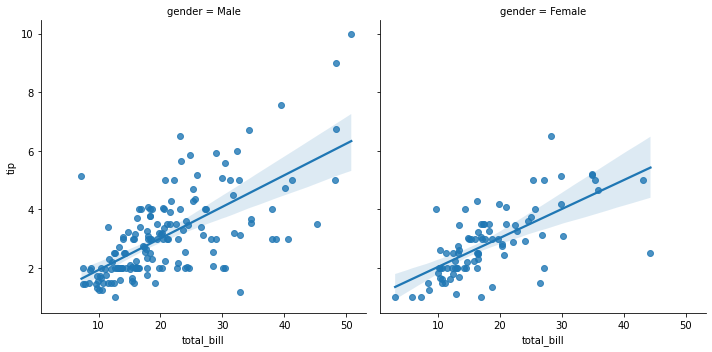

In [66]:
# We can also use the grids instead of using the hue parameter
sns.lmplot(x='total_bill',y='tip',data=df, col='gender')    # instead of differentiating with 2 colors we can plot two different plots

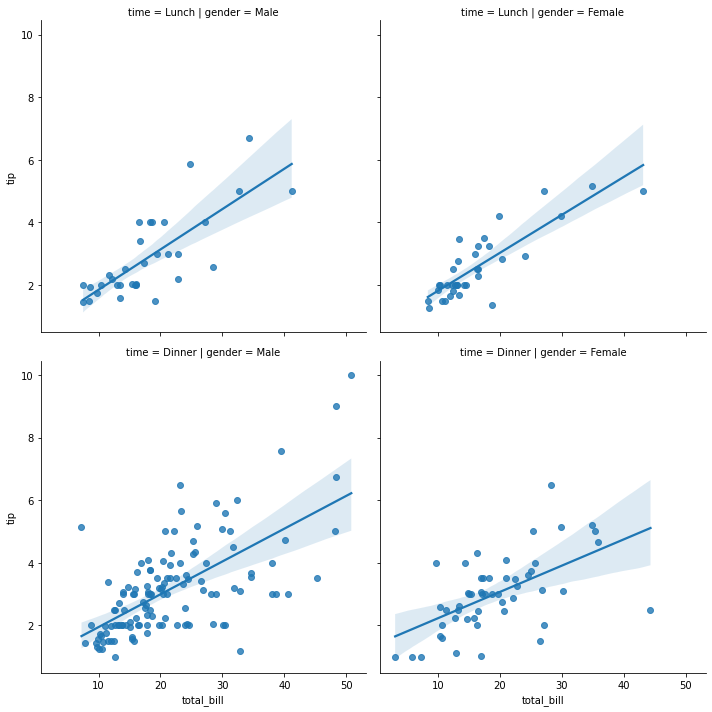

In [67]:
# using this concept we can make similar to Facetgrid
sns.lmplot(x='total_bill',y='tip',data=df, col='gender', row= 'time') 

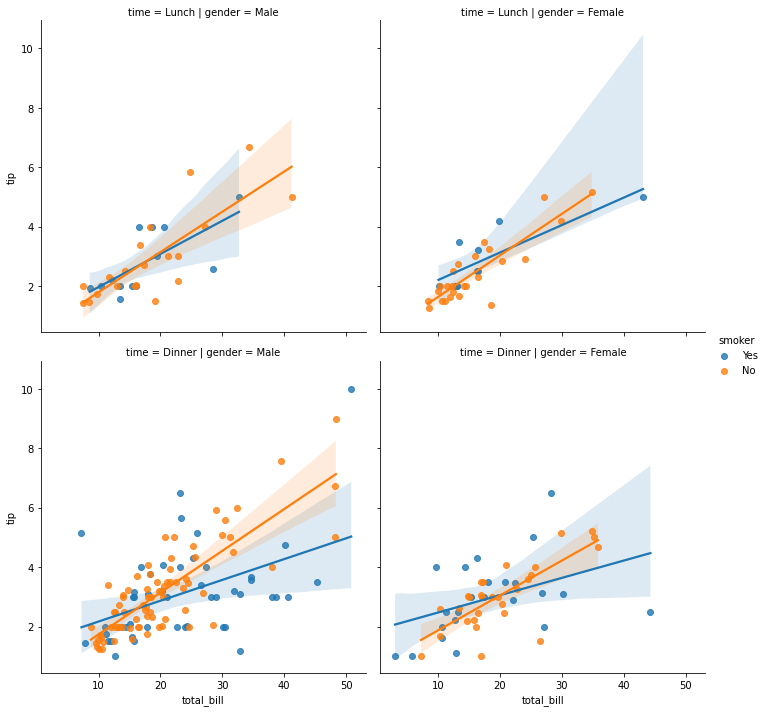

In [68]:
# we can add hue upon these FacetGrid also which provides more information if we have some more categorical data in the DataFrame
sns.lmplot(x='total_bill',y='tip',data=df, col='gender', row= 'time', hue= 'smoker') 
# this actually gives more information than before

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


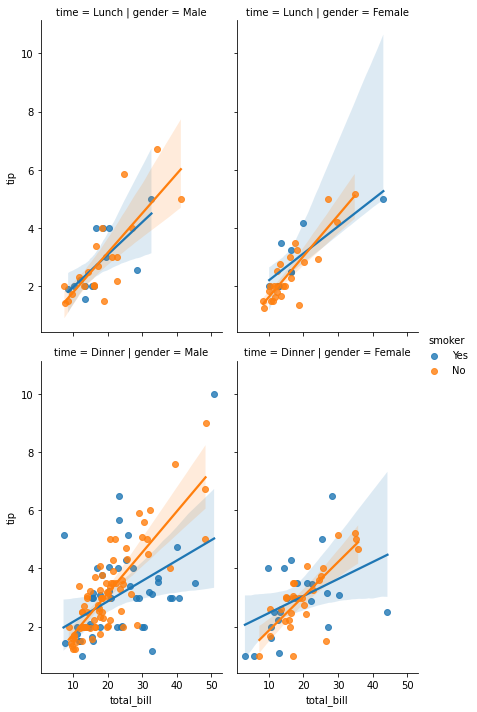

In [69]:
# To change the aspect ratio and siE we use aspect and size parameter respectively
sns.lmplot(x='total_bill',y='tip',data=df, col='gender', row= 'time', hue= 'smoker', aspect=0.6, size= 5) 
# aspect is the ratio between width and height(0<height<0.5, 0.5<width<1)
# size is the total size of the grid

# STYLES AND COLORS

*set_style*

This basically sets the style for all of the plots

It can take string values such as white, darkgrid, whitegrid, ticks

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

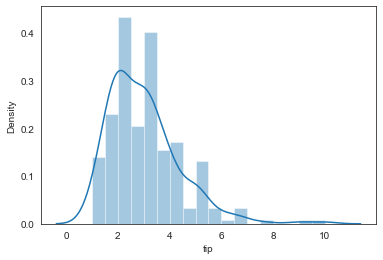

In [70]:
sns.set_style('white')
sns.distplot(df['tip'])

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

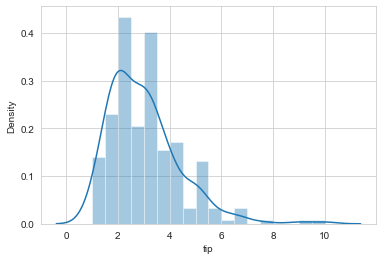

In [71]:
sns.set_style('whitegrid')
sns.distplot(df['tip'])

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

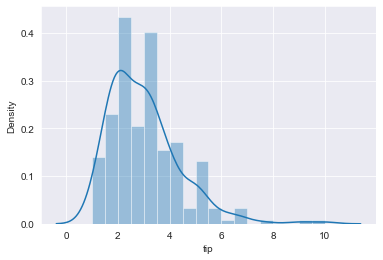

In [72]:
sns.set_style('darkgrid')
sns.distplot(df['tip'])

C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

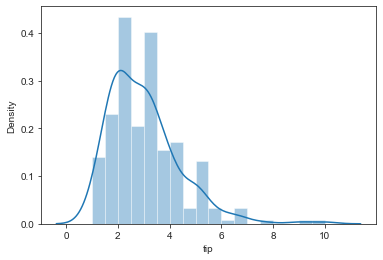

In [73]:
sns.set_style('ticks')
sns.distplot(df['tip'])

*despine*

It will remove top and right spines by default. But we can remove bottom and left spines as well

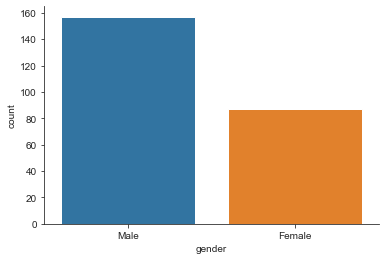

In [74]:
sns.countplot(x='gender', data=df)
sns.despine()       # removes spines, by deafult removes right and top

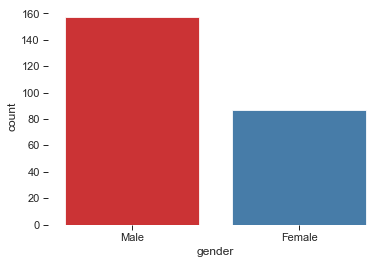

In [75]:
sns.set_theme(context='paper', style= 'ticks', palette='Set1', font_scale=1.25)
sns.countplot(x='gender', data=df)
sns.despine(bottom= True, left= True)   # this removes all spines from the plot we have drawn
#plt.savefig('style.pdf')    

*figsize or Aspect Ratio*

<AxesSubplot:xlabel='gender', ylabel='count'>

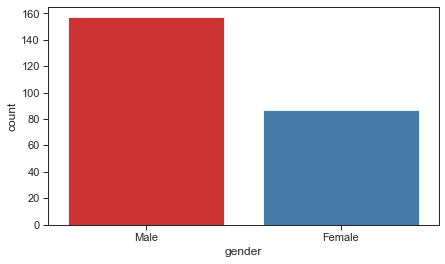

In [76]:
plt.figure(figsize=(7,4))
sns.countplot(x='gender', data=df)